<img src = "https://miro.medium.com/max/3248/1*Y0Hm9PNjNKtTyGue4mQU4w.jpeg">

<h1 style="color:maroon"> PREDICTING THE IMPROBABLE </h1>
<h2 style="color:#de2a5d"> An analysis on Yield Curve as Recession Indicator in the framework of Python Programming <h2>

<h1 style = "color:navy"> Table of Contents </h1><br>
<list>
- <a href='#1'>1. Abstract</a><br>
- <a href='#2'>2. Introduction</a><br>
- <a href='#3'>3. Retrieving the Data</a><br>
- <a href='#4'>4. Preparing the Data</a><br>
- <a href='#5'>5. Data Analysis and Visualisation </a><br>
</list>

# <a id='1'>1. Abstract</a>

### Does the inversion of the Treasury Bond Yield Curve predict an upcoming recession?
This paper serves to study the economic relationship of the Treasury bond yield curve as an indicator of the business cycle, in particular, recessions. The paper employs datasets ranging from the beginning of 1990 to August 2019 to model yield curves and performance of the stock market. This paper utilises a myriad of python programming tools such as NumPy and pandas for analysing the accuracy of past predictions and forecasting the likelihood of an upcoming recession in the global economy.
The forecasting accuracy is tested in an out-of-sample test. Using charting methodologies from the generated plots, it discusses the direction the market is headed in the coming months. The analysis of yield curves had successfully predicted all recessions in the timeframe, but with the recession in early 1990s as inconclusive due to the lack of data.


# <a id='2'>2. Introduction</a>

The fear of financial crashes is a perpetual source of stress, and the onset of the event would change the lives of some. Presently, economic forecast models are viewed with scepticism, believing that markets are unpredictable based on the Efficient Market Hypothesis (Sornette, 2009). <br><br>
However, one indicator had stood out over the decades. The slope of the yield curve spread between the U.S. two-year and 10-year notes, predicts recession with high accuracy. It is a closely watched metric. As of 17 August, Reuters had reported that it is likely to invert for the first time since 2007. It claims that the yield curve has inverted before each recession in the past 50 years (Leong, Burns & Brettell, 2019). The link to the article can be accessed [here](https://www.reuters.com/article/us-usa-economy-yieldcurve-explainer/explainer-countdown-to-recession-what-an-inverted-yield-curve-means-idUSKCN1V320S).<br><br>
The yield refers to the interest rate bondholders receive annually from the bonds. The US Treasury sells Treasury bills, notes and bonds; varying in maturity from 1 month to 30 years, to the public for government’s spending activity. It is generally considered as a haven for investors. These bonds are then traded in the secondary market, influenced by supply and demand. For this report, all Treasury issued fixed income instrument are referred to as Treasury bonds (T-bonds). The yield curve measures the yields of the bonds of varying maturity at a set point in time. <br><br>
Under normal circumstances, the yield curve is upward sloping, where bond buyers assume higher interest for taking on the added risk of holding longer-term bonds. A curve inversion is a phenomenon when shorter-term yields are higher than longer-dated ones. It is said that it predicted every recession, following a curve inversion.<br><br>
The purpose of this paper is to replicate the findings in the Reuters report on the relationship between the yield curve and economic activity; whether a yield curve inversion would indicate a recession. The paper will also look at the S&P 500, to indicate market downturns. <br><br>
The S&P 500 is a stock market index, consisting of a basket of 500 largest companies listed on U.S. stock exchanges. It is largely considered one of the best illustrations of the U.S. economy. The S&P 500 will also be analysed through technical analysis, the study of historical price trends and patterns, to predict future price movements. <br><br>
The paper will first describe the methodologies used for data selection and cleaning. Next, it provides throughout analysis through python programming and its implications. Lastly, the paper would provide a conclusion and the limitations of the research.


# <a id="3" >3. Retrieving the Data</a>

The two datasets identified for this analysis are Daily Treasury Yield Curve Rates and the S&P 500 Daily Historical Prices. The timeframe extracted for this analysis is from 1/1/1990 to 31/08/2019. 
<br><br>
Dataset on S&P 500 was retrieved from [S&P 500 Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC/). Historical data is available to download. It presents the open, high, low, close (OHLC) as well as the adjusted close, volume and date in a comma-separated values (CSV) file. 
<br><br>
Dataset on treasury yields was retrieved from the [U.S. Department of The Treasury website](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield). Retrieving the dataset is done through manual HTML extraction.The data currently available extends from the year 1990 to 2019. The Treasury series available are 1 mo, 2 mo, 3 mo, 6 mo, 1 yr, 2 yr, 3 yr, 5 yr, 7 yr, 10 yr, 20 yr, 30 yr.
<br><br>
Both datasets are in sequential order, with the date as the common denominator. The dates include all trading days. Out of 365 days in a year, there are 52 weekends and several public holidays. The summary of trading days is generated later in the codes.
<br><br>
As the datasets are from reputable sources, they are generally coherent and well-ordered. Python programming is used to identify remaining data quality issues. Thereafter prepare datasets and transform it to be more intelligible for further analysis.


## Steps to retrieve data from [U.S. Department of The Treasury website](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield)

### Step 1 : Inspect element and copy HTML table tag
<img src = "img/step1.png">

### Step 2 : Paste HTML table tag on notepad and save it as a .xls file
<img src = "img/step2.jpg">

### Step 3 : Convert .xls file into a .csv file
<img src = "img/step3.png">

# <a id='4'>4. Preparing the Data</a>

In [1]:
# import packages
import pandas as pd
import numpy as np
import datetime

# to plot within notebook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
%matplotlib inline

# register Pandas Formatters and Converters with matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# import treasury yield data; parse dates
data = pd.read_csv("treasury_yields.csv", parse_dates=True)

# make a copy of the original data
df1 = data.copy()

# see the data
df1.head()

Date  1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
0  1/2/1990   NaN   NaN  7.83  7.89  7.81  7.87  7.90  7.87  7.98   7.94   
1  1/3/1990   NaN   NaN  7.89  7.94  7.85  7.94  7.96  7.92  8.04   7.99   
2  1/4/1990   NaN   NaN  7.84  7.90  7.82  7.92  7.93  7.91  8.02   7.98   
3  1/5/1990   NaN   NaN  7.79  7.85  7.79  7.90  7.94  7.92  8.03   7.99   
4  1/8/1990   NaN   NaN  7.79  7.88  7.81  7.90  7.95  7.92  8.05   8.02   

   20 yr  30 yr  
0    NaN   8.00  
1    NaN   8.04  
2    NaN   8.04  
3    NaN   8.06  
4    NaN   8.09

In [3]:
# see the summary info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Data columns (total 13 columns):
Date     7424 non-null object
1 mo     4524 non-null float64
2 mo     219 non-null float64
3 mo     7420 non-null float64
6 mo     7423 non-null float64
1 yr     7423 non-null float64
2 yr     7423 non-null float64
3 yr     7423 non-null float64
5 yr     7423 non-null float64
7 yr     7423 non-null float64
10 yr    7423 non-null float64
20 yr    6484 non-null float64
30 yr    6429 non-null float64
dtypes: float64(12), object(1)
memory usage: 754.1+ KB


In [4]:
# convert the Date column into the correct format
df1["Date"] = pd.to_datetime(df1["Date"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Data columns (total 13 columns):
Date     7424 non-null datetime64[ns]
1 mo     4524 non-null float64
2 mo     219 non-null float64
3 mo     7420 non-null float64
6 mo     7423 non-null float64
1 yr     7423 non-null float64
2 yr     7423 non-null float64
3 yr     7423 non-null float64
5 yr     7423 non-null float64
7 yr     7423 non-null float64
10 yr    7423 non-null float64
20 yr    6484 non-null float64
30 yr    6429 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 754.1 KB


In [5]:
# date range available
print('Range:', np.min(df1['Date']),"to", np.max(df1['Date']))

Range: 1990-01-02 00:00:00 to 2019-08-30 00:00:00


In [6]:
# check the first 10 rows
df1.head(10)

Date  1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
0 1990-01-02   NaN   NaN  7.83  7.89  7.81  7.87  7.90  7.87  7.98   7.94   
1 1990-01-03   NaN   NaN  7.89  7.94  7.85  7.94  7.96  7.92  8.04   7.99   
2 1990-01-04   NaN   NaN  7.84  7.90  7.82  7.92  7.93  7.91  8.02   7.98   
3 1990-01-05   NaN   NaN  7.79  7.85  7.79  7.90  7.94  7.92  8.03   7.99   
4 1990-01-08   NaN   NaN  7.79  7.88  7.81  7.90  7.95  7.92  8.05   8.02   
5 1990-01-09   NaN   NaN  7.80  7.82  7.78  7.91  7.94  7.92  8.05   8.02   
6 1990-01-10   NaN   NaN  7.75  7.78  7.77  7.91  7.95  7.92  8.00   8.03   
7 1990-01-11   NaN   NaN  7.80  7.80  7.77  7.91  7.95  7.94  8.01   8.04   
8 1990-01-12   NaN   NaN  7.74  7.81  7.76  7.93  7.98  7.99  8.07   8.10   
9 1990-01-16   NaN   NaN  7.89  7.99  7.92  8.10  8.13  8.11  8.18   8.20   

   20 yr  30 yr  
0    NaN   8.00  
1    NaN   8.04  
2    NaN   8.04  
3    NaN   8.06  
4    NaN   8.09  
5    NaN   8.10  
6    NaN   8.11  
7    NaN   8.11  
8    NaN   8.17  
9    NaN   8.25

In [7]:
# check the last 10 rows
df1.tail(10)

Date  1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
7414 2019-08-19  2.06  1.96  1.94  1.90  1.75  1.53  1.49  1.47  1.54   1.60   
7415 2019-08-20  2.05  1.96  1.94  1.89  1.72  1.50  1.44  1.42  1.49   1.55   
7416 2019-08-21  2.03  1.98  1.97  1.90  1.77  1.56  1.50  1.47  1.54   1.59   
7417 2019-08-22  2.10  2.02  2.00  1.91  1.79  1.61  1.53  1.50  1.56   1.62   
7418 2019-08-23  2.07  2.02  1.97  1.87  1.73  1.51  1.43  1.40  1.46   1.52   
7419 2019-08-26  2.09  2.03  2.01  1.90  1.75  1.54  1.47  1.43  1.49   1.54   
7420 2019-08-27  2.07  2.03  1.98  1.94  1.77  1.53  1.43  1.40  1.44   1.49   
7421 2019-08-28  2.07  2.04  1.99  1.89  1.74  1.50  1.42  1.37  1.42   1.47   
7422 2019-08-29  2.10  2.03  1.99  1.89  1.75  1.53  1.44  1.40  1.46   1.50   
7423 2019-08-30  2.10  2.04  1.99  1.89  1.76  1.50  1.42  1.39  1.45   1.50   

      20 yr  30 yr  
7414   1.88   2.08  
7415   1.84   2.04  
7416   1.87   2.07  
7417   1.90   2.11  
7418   1.82   2.02  
7419   1.84   2.04  
7420   1.77   1.97  
7421   1.76   1.94  
7422   1.78   1.97  
7423   1.78   1.96

In [46]:
# set Date as index
df1.index = df1["Date"]

# sort data from the earliest to the latest i.e. ascending
df1 = df1.sort_index(ascending=True, axis=0)

# check the first 5 rows
df1.head(5)

Date  1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  \
Date                                                                          
1990-01-02 1990-01-02   NaN   NaN  7.83  7.89  7.81  7.87  7.90  7.87  7.98   
1990-01-03 1990-01-03   NaN   NaN  7.89  7.94  7.85  7.94  7.96  7.92  8.04   
1990-01-04 1990-01-04   NaN   NaN  7.84  7.90  7.82  7.92  7.93  7.91  8.02   
1990-01-05 1990-01-05   NaN   NaN  7.79  7.85  7.79  7.90  7.94  7.92  8.03   
1990-01-08 1990-01-08   NaN   NaN  7.79  7.88  7.81  7.90  7.95  7.92  8.05   

            10 yr  20 yr  30 yr  
Date                             
1990-01-02   7.94    NaN   8.00  
1990-01-03   7.99    NaN   8.04  
1990-01-04   7.98    NaN   8.04  
1990-01-05   7.99    NaN   8.06  
1990-01-08   8.02    NaN   8.09

In [9]:
# check the last 10 rows
df1.tail(10)

Date  1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  \
Date                                                                          
2019-08-19 2019-08-19  2.06  1.96  1.94  1.90  1.75  1.53  1.49  1.47  1.54   
2019-08-20 2019-08-20  2.05  1.96  1.94  1.89  1.72  1.50  1.44  1.42  1.49   
2019-08-21 2019-08-21  2.03  1.98  1.97  1.90  1.77  1.56  1.50  1.47  1.54   
2019-08-22 2019-08-22  2.10  2.02  2.00  1.91  1.79  1.61  1.53  1.50  1.56   
2019-08-23 2019-08-23  2.07  2.02  1.97  1.87  1.73  1.51  1.43  1.40  1.46   
2019-08-26 2019-08-26  2.09  2.03  2.01  1.90  1.75  1.54  1.47  1.43  1.49   
2019-08-27 2019-08-27  2.07  2.03  1.98  1.94  1.77  1.53  1.43  1.40  1.44   
2019-08-28 2019-08-28  2.07  2.04  1.99  1.89  1.74  1.50  1.42  1.37  1.42   
2019-08-29 2019-08-29  2.10  2.03  1.99  1.89  1.75  1.53  1.44  1.40  1.46   
2019-08-30 2019-08-30  2.10  2.04  1.99  1.89  1.76  1.50  1.42  1.39  1.45   

            10 yr  20 yr  30 yr  
Date                             
2019-08-19   1.60   1.88   2.08  
2019-08-20   1.55   1.84   2.04  
2019-08-21   1.59   1.87   2.07  
2019-08-22   1.62   1.90   2.11  
2019-08-23   1.52   1.82   2.02  
2019-08-26   1.54   1.84   2.04  
2019-08-27   1.49   1.77   1.97  
2019-08-28   1.47   1.76   1.94  
2019-08-29   1.50   1.78   1.97  
2019-08-30   1.50   1.78   1.96

In [47]:
# describe the data
df1.describe()

1 mo        2 mo         3 mo         6 mo         1 yr  \
count  4524.000000  219.000000  7420.000000  7423.000000  7423.000000   
mean      1.289945    2.321050     2.791458     2.925257     3.055533   
std       1.498050    0.140312     2.294147     2.326361     2.321815   
min       0.000000    1.950000     0.000000     0.020000     0.080000   
25%       0.060000    2.220000     0.280000     0.450000     0.600000   
50%       0.880000    2.390000     2.450000     2.540000     2.710000   
75%       1.980000    2.430000     5.030000     5.130000     5.180000   
max       5.270000    2.480000     8.260000     8.490000     8.640000   

              2 yr         3 yr         5 yr         7 yr        10 yr  \
count  7423.000000  7423.000000  7423.000000  7423.000000  7423.000000   
mean      3.364417     3.586698     3.990054     4.300442     4.540609   
std       2.334657     2.275051     2.141514     2.038247     1.916519   
min       0.160000     0.280000     0.560000     0.910000     1.370000   
25%       0.980000     1.430000     1.950000     2.365000     2.770000   
50%       3.210000     3.590000     3.960000     4.220000     4.450000   
75%       5.450000     5.580000     5.790000     5.990000     6.000000   
max       9.050000     9.110000     9.100000     9.120000     9.090000   

             20 yr        30 yr  
count  6484.000000  6429.000000  
mean      4.641107     5.094679  
std       1.584403     1.837165  
min       1.690000     1.940000  
25%       3.030000     3.210000  
50%       4.740000     4.910000  
75%       5.880000     6.570000  
max       8.300000     9.180000

In [10]:
df1.groupby(pd.Grouper(level=0, freq = "Y")).count()

Date  1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
Date                                                                            
1990-12-31   250     0     0   250   250   250   250   250   250   250    250   
1991-12-31   250     0     0   250   250   250   250   250   250   250    250   
1992-12-31   251     0     0   251   251   251   251   251   251   251    251   
1993-12-31   250     0     0   250   250   250   250   250   250   250    250   
1994-12-31   249     0     0   249   249   249   249   249   249   249    249   
1995-12-31   250     0     0   250   250   250   250   250   250   250    250   
1996-12-31   252     0     0   252   252   252   252   252   252   252    252   
1997-12-31   250     0     0   250   250   250   250   250   250   250    250   
1998-12-31   250     0     0   250   250   250   250   250   250   250    250   
1999-12-31   251     0     0   251   251   251   251   251   251   251    251   
2000-12-31   251     0     0   251   251   251   251   251   251   251    251   
2001-12-31   248   103     0   248   248   248   248   248   248   248    248   
2002-12-31   250   250     0   250   250   250   250   250   250   250    250   
2003-12-31   250   250     0   250   250   250   250   250   250   250    250   
2004-12-31   250   250     0   250   250   250   250   250   250   250    250   
2005-12-31   250   250     0   250   250   250   250   250   250   250    250   
2006-12-31   250   250     0   250   250   250   250   250   250   250    250   
2007-12-31   251   251     0   251   251   251   251   251   251   251    251   
2008-12-31   251   251     0   248   251   251   251   251   251   251    251   
2009-12-31   250   250     0   250   250   250   250   250   250   250    250   
2010-12-31   252   251     0   251   251   251   251   251   251   251    251   
2011-12-31   250   250     0   250   250   250   250   250   250   250    250   
2012-12-31   250   250     0   250   250   250   250   250   250   250    250   
2013-12-31   250   250     0   250   250   250   250   250   250   250    250   
2014-12-31   250   250     0   250   250   250   250   250   250   250    250   
2015-12-31   251   251     0   251   251   251   251   251   251   251    251   
2016-12-31   250   250     0   250   250   250   250   250   250   250    250   
2017-12-31   250   250     0   250   250   250   250   250   250   250    250   
2018-12-31   249   249    51   249   249   249   249   249   249   249    249   
2019-12-31   168   168   168   168   168   168   168   168   168   168    168   

            20 yr  30 yr  
Date                      
1990-12-31      0    250  
1991-12-31      0    250  
1992-12-31      0    251  
1993-12-31     62    250  
1994-12-31    249    249  
1995-12-31    250    250  
1996-12-31    252    252  
1997-12-31    250    250  
1998-12-31    250    250  
1999-12-31    251    251  
2000-12-31    251    251  
2001-12-31    248    248  
2002-12-31    250     32  
2003-12-31    250      0  
2004-12-31    250      0  
2005-12-31    250      0  
2006-12-31    250    224  
2007-12-31    251    251  
2008-12-31    251    251  
2009-12-31    250    250  
2010-12-31    251    251  
2011-12-31    250    250  
2012-12-31    250    250  
2013-12-31    250    250  
2014-12-31    250    250  
2015-12-31    251    251  
2016-12-31    250    250  
2017-12-31    250    250  
2018-12-31    249    249  
2019-12-31    168    168

In [12]:
# import S&P500 data; parse dates
data = pd.read_csv("S&P500.csv", parse_dates=True)

# make a copy of the original data
df2 = data.copy()

# see the data
df2.head()

Date        Open        High         Low       Close   Adj Close  \
0  1990-01-02  353.399994  359.690002  351.980011  359.690002  359.690002   
1  1990-01-03  359.690002  360.589996  357.890015  358.760010  358.760010   
2  1990-01-04  358.760010  358.760010  352.890015  355.670013  355.670013   
3  1990-01-05  355.670013  355.670013  351.350006  352.200012  352.200012   
4  1990-01-08  352.200012  354.239990  350.540009  353.790009  353.790009   

      Volume  
0  162070000  
1  192330000  
2  177000000  
3  158530000  
4  140110000

In [13]:
# see the summary info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7475 entries, 0 to 7474
Data columns (total 7 columns):
Date         7475 non-null object
Open         7475 non-null float64
High         7475 non-null float64
Low          7475 non-null float64
Close        7475 non-null float64
Adj Close    7475 non-null float64
Volume       7475 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 408.9+ KB


In [14]:
# convert the Date column into the correct format
df2["Date"] = pd.to_datetime(df2["Date"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7475 entries, 0 to 7474
Data columns (total 7 columns):
Date         7475 non-null datetime64[ns]
Open         7475 non-null float64
High         7475 non-null float64
Low          7475 non-null float64
Close        7475 non-null float64
Adj Close    7475 non-null float64
Volume       7475 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 408.9 KB


In [15]:
# date range available
print('Range:', np.min(df2['Date']),"to", np.max(df2['Date']))

Range: 1990-01-02 00:00:00 to 2019-08-30 00:00:00


In [16]:
# check the first 10 rows
df2.head(10)

Date        Open        High         Low       Close   Adj Close  \
0 1990-01-02  353.399994  359.690002  351.980011  359.690002  359.690002   
1 1990-01-03  359.690002  360.589996  357.890015  358.760010  358.760010   
2 1990-01-04  358.760010  358.760010  352.890015  355.670013  355.670013   
3 1990-01-05  355.670013  355.670013  351.350006  352.200012  352.200012   
4 1990-01-08  352.200012  354.239990  350.540009  353.790009  353.790009   
5 1990-01-09  353.829987  354.170013  349.609985  349.619995  349.619995   
6 1990-01-10  349.619995  349.619995  344.320007  347.309998  347.309998   
7 1990-01-11  347.309998  350.140015  347.309998  348.529999  348.529999   
8 1990-01-12  348.529999  348.529999  339.489990  339.929993  339.929993   
9 1990-01-15  339.929993  339.940002  336.570007  337.000000  337.000000   

      Volume  
0  162070000  
1  192330000  
2  177000000  
3  158530000  
4  140110000  
5  155210000  
6  175990000  
7  154390000  
8  183880000  
9  140590000

In [17]:
# check the last 10 rows
df2.tail(10)

Date         Open         High          Low        Close  \
7465 2019-08-19  2913.479980  2931.000000  2913.479980  2923.649902   
7466 2019-08-20  2919.010010  2923.629883  2899.600098  2900.510010   
7467 2019-08-21  2922.040039  2928.729980  2917.909912  2924.429932   
7468 2019-08-22  2930.939941  2939.080078  2904.510010  2922.949951   
7469 2019-08-23  2911.070068  2927.010010  2834.969971  2847.110107   
7470 2019-08-26  2866.699951  2879.270020  2856.000000  2878.379883   
7471 2019-08-27  2893.139893  2898.790039  2860.590088  2869.159912   
7472 2019-08-28  2861.280029  2890.030029  2853.050049  2887.939941   
7473 2019-08-29  2910.370117  2930.500000  2905.669922  2924.580078   
7474 2019-08-30  2937.090088  2940.429932  2913.320068  2926.459961   

        Adj Close      Volume  
7465  2923.649902  3212880000  
7466  2900.510010  3066300000  
7467  2924.429932  3011190000  
7468  2922.949951  2890880000  
7469  2847.110107  3937300000  
7470  2878.379883  2857600000  
7471  2869.159912  3533630000  
7472  2887.939941  3097420000  
7473  2924.580078  3176190000  
7474  2926.459961  3008450000

In [18]:
# set index as Date
df2.index = df2["Date"]

# sort data from the earliest to the latest i.e. ascending
df2 = df2.sort_index(ascending=True, axis=0)

# check the first 10 rows
df2.head(10)

Date        Open        High         Low       Close  \
Date                                                                    
1990-01-02 1990-01-02  353.399994  359.690002  351.980011  359.690002   
1990-01-03 1990-01-03  359.690002  360.589996  357.890015  358.760010   
1990-01-04 1990-01-04  358.760010  358.760010  352.890015  355.670013   
1990-01-05 1990-01-05  355.670013  355.670013  351.350006  352.200012   
1990-01-08 1990-01-08  352.200012  354.239990  350.540009  353.790009   
1990-01-09 1990-01-09  353.829987  354.170013  349.609985  349.619995   
1990-01-10 1990-01-10  349.619995  349.619995  344.320007  347.309998   
1990-01-11 1990-01-11  347.309998  350.140015  347.309998  348.529999   
1990-01-12 1990-01-12  348.529999  348.529999  339.489990  339.929993   
1990-01-15 1990-01-15  339.929993  339.940002  336.570007  337.000000   

             Adj Close     Volume  
Date                               
1990-01-02  359.690002  162070000  
1990-01-03  358.760010  192330000  
1990-01-04  355.670013  177000000  
1990-01-05  352.200012  158530000  
1990-01-08  353.790009  140110000  
1990-01-09  349.619995  155210000  
1990-01-10  347.309998  175990000  
1990-01-11  348.529999  154390000  
1990-01-12  339.929993  183880000  
1990-01-15  337.000000  140590000

In [19]:
# check the last 10 rows
df2.tail(10)

Date         Open         High          Low        Close  \
Date                                                                        
2019-08-19 2019-08-19  2913.479980  2931.000000  2913.479980  2923.649902   
2019-08-20 2019-08-20  2919.010010  2923.629883  2899.600098  2900.510010   
2019-08-21 2019-08-21  2922.040039  2928.729980  2917.909912  2924.429932   
2019-08-22 2019-08-22  2930.939941  2939.080078  2904.510010  2922.949951   
2019-08-23 2019-08-23  2911.070068  2927.010010  2834.969971  2847.110107   
2019-08-26 2019-08-26  2866.699951  2879.270020  2856.000000  2878.379883   
2019-08-27 2019-08-27  2893.139893  2898.790039  2860.590088  2869.159912   
2019-08-28 2019-08-28  2861.280029  2890.030029  2853.050049  2887.939941   
2019-08-29 2019-08-29  2910.370117  2930.500000  2905.669922  2924.580078   
2019-08-30 2019-08-30  2937.090088  2940.429932  2913.320068  2926.459961   

              Adj Close      Volume  
Date                                 
2019-08-19  2923.649902  3212880000  
2019-08-20  2900.510010  3066300000  
2019-08-21  2924.429932  3011190000  
2019-08-22  2922.949951  2890880000  
2019-08-23  2847.110107  3937300000  
2019-08-26  2878.379883  2857600000  
2019-08-27  2869.159912  3533630000  
2019-08-28  2887.939941  3097420000  
2019-08-29  2924.580078  3176190000  
2019-08-30  2926.459961  3008450000

In [20]:
df2.describe()

Open         High          Low        Close    Adj Close  \
count  7475.000000  7475.000000  7475.000000  7475.000000  7475.000000   
mean   1246.361326  1253.555544  1238.651645  1246.619740  1246.619740   
std     648.522906   650.955191   645.789771   648.527786   648.527786   
min     295.450012   301.450012   294.510010   295.459991   295.459991   
25%     798.540008   806.095001   789.500000   798.554993   798.554993   
50%    1187.699951  1193.520020  1179.589966  1187.699951  1187.699951   
75%    1470.894959  1479.380005  1460.320007  1471.419983  1471.419983   
max    3024.469971  3027.979980  3014.300049  3025.860107  3025.860107   

             Volume  
count  7.475000e+03  
mean   2.171642e+09  
std    1.761136e+09  
min    1.499000e+07  
25%    5.023650e+08  
50%    1.629700e+09  
75%    3.539060e+09  
max    1.145623e+10

In [21]:
# group the date by year
df2["Date"].groupby(df2["Date"].dt.year).count()

Date
1990    253
1991    253
1992    254
1993    253
1994    252
1995    252
1996    254
1997    253
1998    252
1999    252
2000    252
2001    248
2002    252
2003    252
2004    252
2005    252
2006    251
2007    251
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    168
Name: Date, dtype: int64

# <a id="5"> 5. Data Analysis and Visualisation </a>

## Treasury Yields Analysis

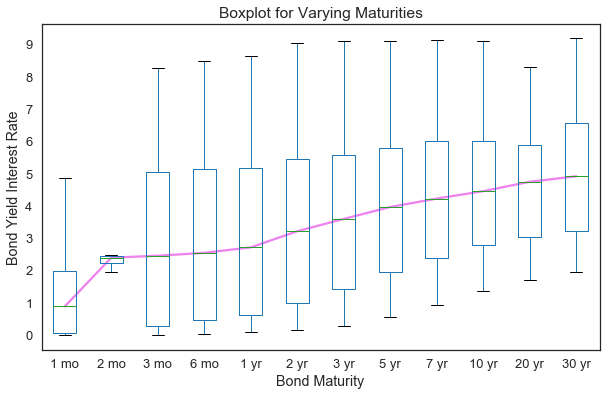

In [56]:
# boxplot yield curve; median yield curve
# set figure size
plt.figure(figsize = (10, 6))
# due to the nature of boxplot axis starting at 1, shift line plot to axis 1
plt.plot(list(range(1, 13)), df1.median(), color="violet")
df1.boxplot()

# chart elements
plt.title('Boxplot for Varying Maturities')
# set y ticks; intervals of 1
plt.yticks(np.arange(0, 10, step=1))
plt.ylabel("Bond Yield Interest Rate")
plt.xlabel("Bond Maturity")
plt.grid(b=None)
plt.show()

In [23]:
# new df1 for 2019; drop Date column
df1_2019 = df1.loc[df1['Date']>='2019-01-01'].drop(columns=["Date"])
df1_2019.head()

1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
Date                                                                      
2019-01-02  2.40  2.40  2.42  2.51  2.60  2.50  2.47  2.49  2.56   2.66   
2019-01-03  2.42  2.42  2.41  2.47  2.50  2.39  2.35  2.37  2.44   2.56   
2019-01-04  2.40  2.42  2.42  2.51  2.57  2.50  2.47  2.49  2.56   2.67   
2019-01-07  2.42  2.42  2.45  2.54  2.58  2.53  2.51  2.53  2.60   2.70   
2019-01-08  2.40  2.42  2.46  2.54  2.60  2.58  2.57  2.58  2.63   2.73   

            20 yr  30 yr  
Date                      
2019-01-02   2.83   2.97  
2019-01-03   2.75   2.92  
2019-01-04   2.83   2.98  
2019-01-07   2.86   2.99  
2019-01-08   2.88   3.00

In [1]:
fig = plt.figure(figsize=(16, 8))
plt.ylabel('Bond Yield Rate Ratio')
plt.plot(df1_2019['Date'],df1_2019['30 yr'])
plt.plot(df1_2019['Date'],df1_2019['20 yr'])
plt.plot(df1_2019['Date'],df1_2019['10 yr'])
plt.plot(df1_2019['Date'],df1_2019['7 yr'])
plt.plot(df1_2019['Date'],df1_2019['5 yr'])
plt.plot(df1_2019['Date'],df1_2019['3 yr'])
plt.plot(df1_2019['Date'],df1_2019['2 yr'])
plt.plot(df1_2019['Date'],df1_2019['1 yr'])
plt.plot(df1_2019['Date'],df1_2019['6 mo'])
plt.plot(df1_2019['Date'],df1_2019['3 mo'])
plt.plot(df1_2019['Date'],df1_2019['2 mo'])
plt.plot(df1_2019['Date'],df1_2019['1 mo'])
plt.suptitle('Interest Rates')
plt.legend(frameon = "true")
plt.grid()
plt.show()

NameError: name 'plt' is not defined

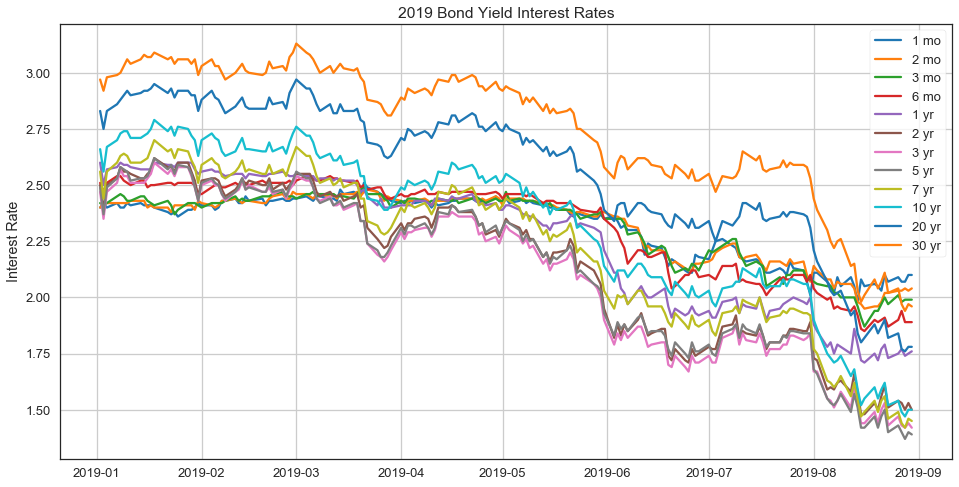

In [57]:
# plot line graphs for the different yield maturities 2019
fig = plt.figure(figsize=(16, 8))

# for look to reiterate line plot for different maturities
for m in range(len(df1_2019.columns)):
    # change Date index to series data for x axis
    # interest rates for a particular maturity for y axis
    plt.plot(df1_2019.index.to_series(), df1_2019[df1_2019.columns[m]])
    plt.legend(frameon="true")
    
# chart elements    
plt.title('2019 Bond Yield Interest Rates')
plt.ylabel('Interest Rate')
plt.grid()
plt.show()

In [58]:
# resample the daily data into weekly data; drop Date column
df1_month = df1.resample("M").last().drop(columns = ["Date"])

# check the last 5 rows
df1_month.tail()

1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
Date                                                                      
2019-04-30  2.43  2.44  2.43  2.46  2.39  2.27  2.24  2.28  2.39   2.51   
2019-05-31  2.35  2.38  2.35  2.35  2.21  1.95  1.90  1.93  2.03   2.14   
2019-06-30  2.18  2.15  2.12  2.09  1.92  1.75  1.71  1.76  1.87   2.00   
2019-07-31  2.01  2.07  2.08  2.10  2.00  1.89  1.84  1.84  1.92   2.02   
2019-08-31  2.10  2.04  1.99  1.89  1.76  1.50  1.42  1.39  1.45   1.50   

            20 yr  30 yr  
Date                      
2019-04-30   2.75   2.93  
2019-05-31   2.39   2.58  
2019-06-30   2.31   2.52  
2019-07-31   2.31   2.53  
2019-08-31   1.78   1.96

In [59]:
# resample the monthly data into quarterly data; end of each quarter
df1_quarter = df1_month.iloc[2::3, :]

# check the first 5 rows
df1_quarter.head(5)

1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
Date                                                                      
1990-03-31   NaN   NaN  8.07  8.24  8.35  8.64  8.69  8.65  8.70   8.65   
1990-06-30   NaN   NaN  8.00  8.02  8.05  8.24  8.32  8.35  8.46   8.43   
1990-09-30   NaN   NaN  7.37  7.54  7.69  8.02  8.19  8.47  8.73   8.82   
1990-12-31   NaN   NaN  6.63  6.73  6.82  7.15  7.40  7.68  8.00   8.08   
1991-03-31   NaN   NaN  5.92  6.05  6.28  7.02  7.30  7.73  7.96   8.05   

            20 yr  30 yr  
Date                      
1990-03-31    NaN   8.63  
1990-06-30    NaN   8.41  
1990-09-30    NaN   8.96  
1990-12-31    NaN   8.26  
1991-03-31    NaN   8.24

In [28]:
# check the last 10 rows
df1_quarter.tail(10)

1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
Date                                                                      
2017-03-31  0.74   NaN  0.76  0.91  1.03  1.27  1.50  1.93  2.22   2.40   
2017-06-30  0.84   NaN  1.03  1.14  1.24  1.38  1.55  1.89  2.14   2.31   
2017-09-30  0.96   NaN  1.06  1.20  1.31  1.47  1.62  1.92  2.16   2.33   
2017-12-31  1.28   NaN  1.39  1.53  1.76  1.89  1.98  2.20  2.33   2.40   
2018-03-31  1.63   NaN  1.73  1.93  2.09  2.27  2.39  2.56  2.68   2.74   
2018-06-30  1.77   NaN  1.93  2.11  2.33  2.52  2.63  2.73  2.81   2.85   
2018-09-30  2.12   NaN  2.19  2.36  2.59  2.81  2.88  2.94  3.01   3.05   
2018-12-31  2.44  2.45  2.45  2.56  2.63  2.48  2.46  2.51  2.59   2.69   
2019-03-31  2.43  2.44  2.40  2.44  2.40  2.27  2.21  2.23  2.31   2.41   
2019-06-30  2.18  2.15  2.12  2.09  1.92  1.75  1.71  1.76  1.87   2.00   

            20 yr  30 yr  
Date                      
2017-03-31   2.76   3.02  
2017-06-30   2.61   2.84  
2017-09-30   2.63   2.86  
2017-12-31   2.58   2.74  
2018-03-31   2.85   2.97  
2018-06-30   2.91   2.98  
2018-09-30   3.13   3.19  
2018-12-31   2.87   3.02  
2019-03-31   2.63   2.81  
2019-06-30   2.31   2.52

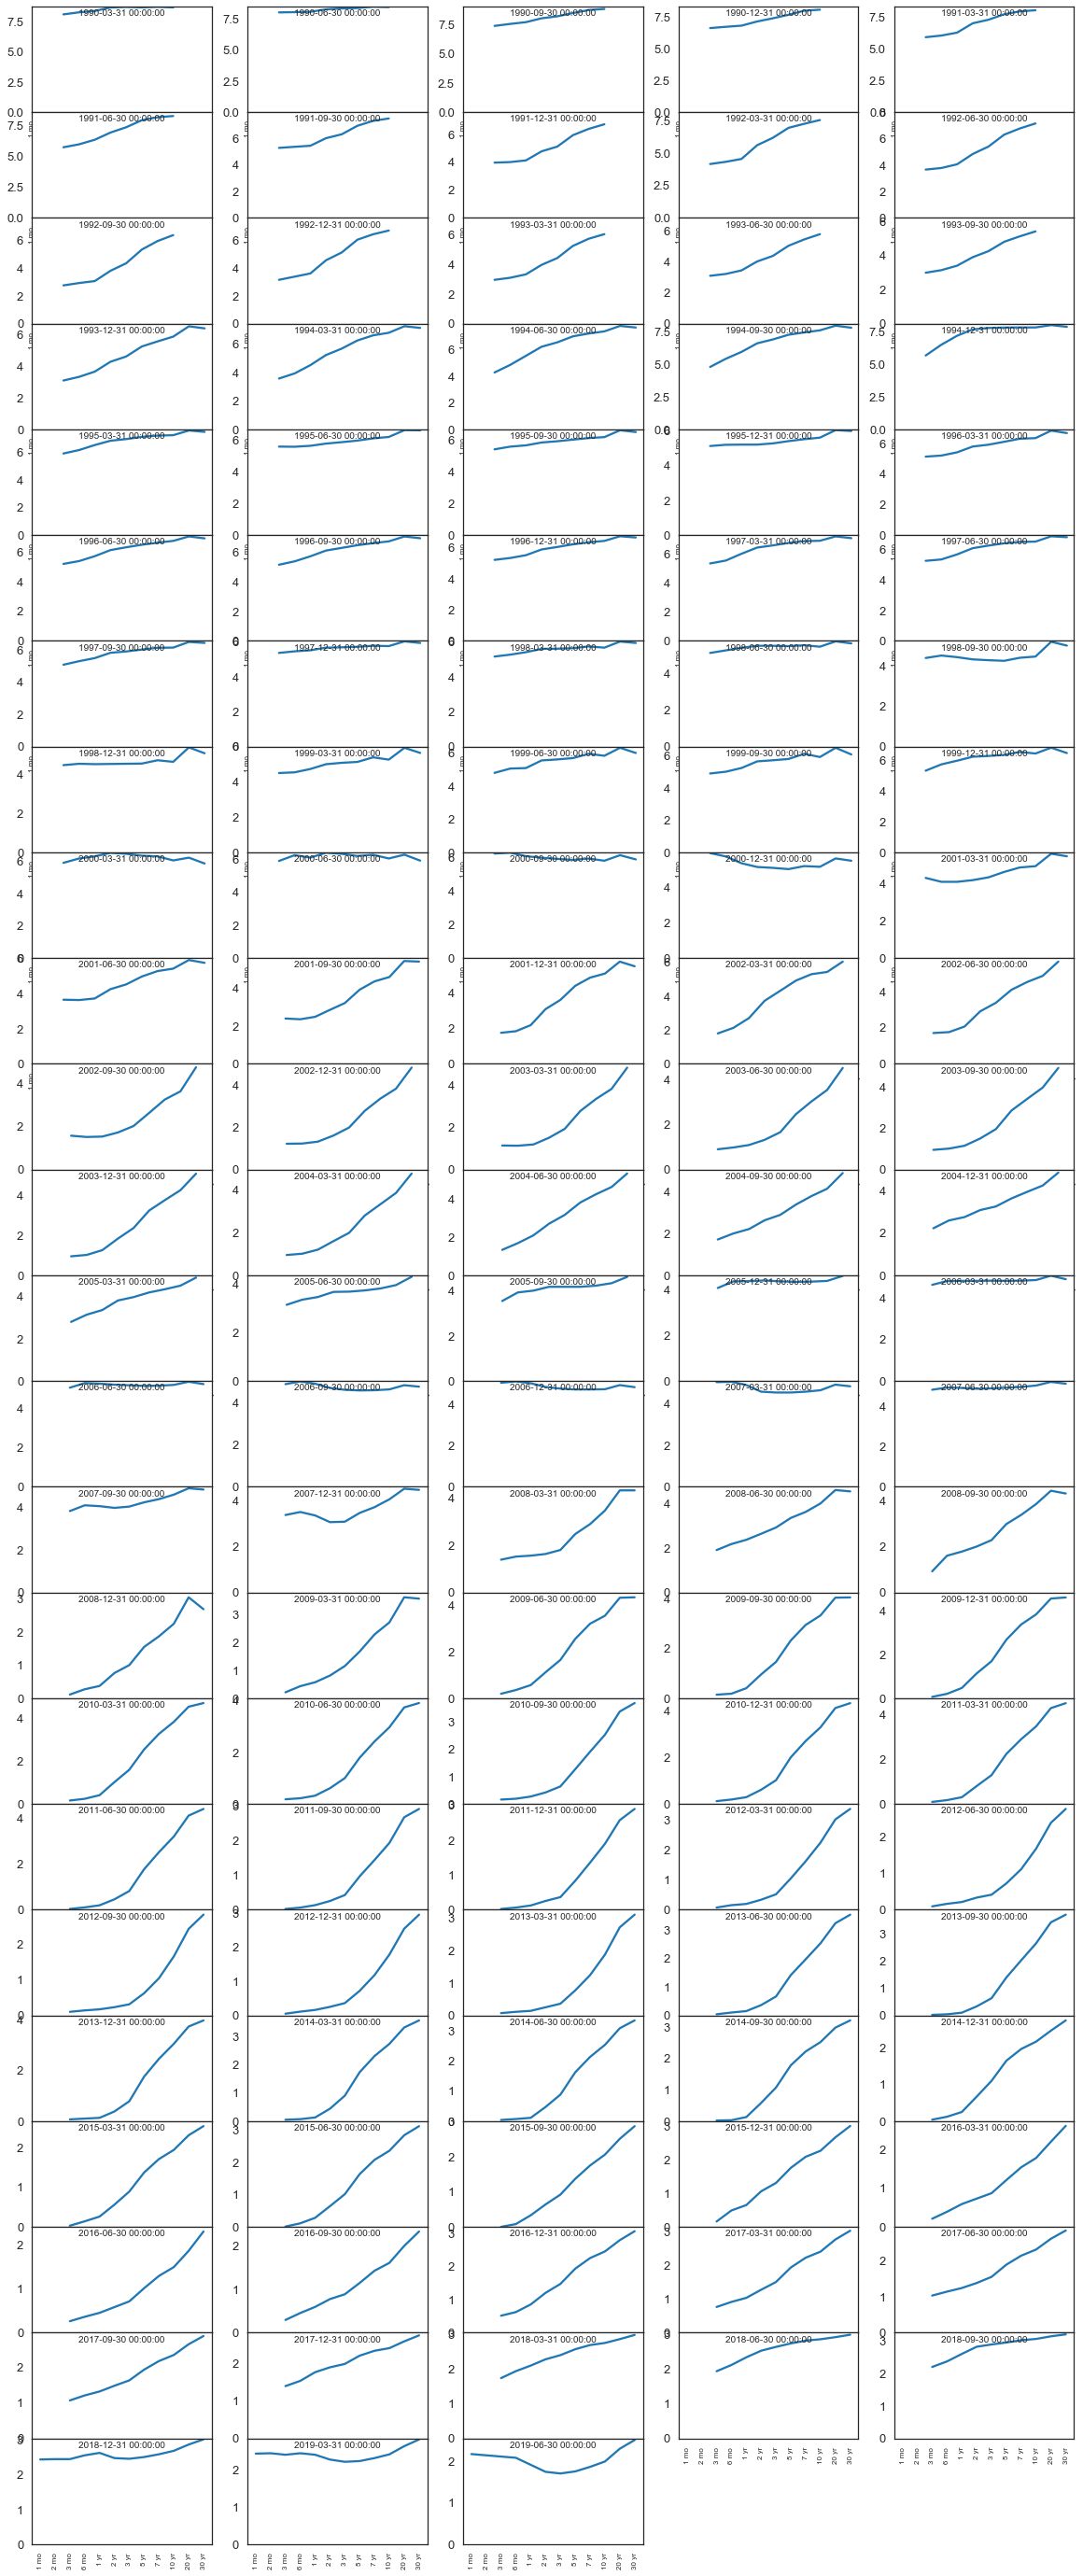

In [67]:
# subplot settings, 24*5 plots
fig, axes = plt.subplots(nrows=24, ncols=5, figsize=(20, 50))

# zips Date with axes
# e.g. ((1990-03-31, axes[0]), (2017-06-30, axes[1]), ...)
for row, ax in zip(df1_quarter.index, axes.flatten()):
    # plot line graph for particular Date
    ax.plot(df1_quarter.loc[row].values)
    # adjust title heading
    ax.set_title(row, fontsize=10, loc="center", pad=-10)
    # set x ticks based on number of maturities
    ax.set_xticks(range(df1_quarter.shape[1]))
    # set x tick labels based on the different maturities
    ax.set_xticklabels(list(df1_quarter.columns), rotation=90, fontsize=8)
    # set y axis starting from 0
    ax.set_ylim(ymin=0)
    # adjust spacing
    plt.subplots_adjust(wspace=.2, hspace=0)

# delete empty subplots    
fig.delaxes(axes[23, 4])
fig.delaxes(axes[23, 3])
plt.show()

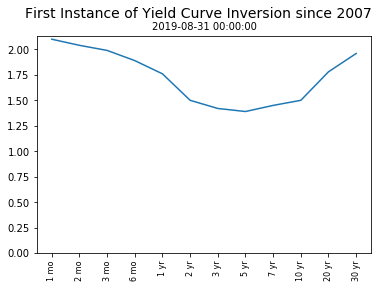

In [30]:
# plot last day of the dataframe
plt.suptitle("First Instance of Yield Curve Inversion since 2007",
             fontsize=14)

# locate and plot last row of data
fig = df1_month.iloc[-1].plot()

# chart elements
fig.set_title(df1_month.index[-1], fontsize=10, loc="center")
fig.set_xticks(range(df1_month.shape[1]))
fig.set_xticklabels(list(df1_month.columns), rotation=90, fontsize=8)
fig.set_ylim(ymin=0)
plt.show()

In [68]:
# create new columns for the yield spreads
df1_month["10yr-3mo"] = df1_month["10 yr"] - df1_month["3 mo"]
df1_month["10yr-2yr"] = df1_month["10 yr"] - df1_month["2 yr"]

# check the first 5 rows
df1_month.head()

1 mo  2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr  10 yr  \
Date                                                                      
1990-01-31   NaN   NaN  8.00  8.13  8.08  8.28  8.36  8.35  8.39   8.43   
1990-02-28   NaN   NaN  8.04  8.14  8.12  8.43  8.45  8.44  8.54   8.51   
1990-03-31   NaN   NaN  8.07  8.24  8.35  8.64  8.69  8.65  8.70   8.65   
1990-04-30   NaN   NaN  8.07  8.44  8.58  8.96  9.05  9.04  9.06   9.04   
1990-05-31   NaN   NaN  8.01  8.12  8.22  8.50  8.53  8.56  8.64   8.60   

            20 yr  30 yr  10yr-3mo  10yr-2yr  
Date                                          
1990-01-31    NaN   8.46      0.43      0.15  
1990-02-28    NaN   8.54      0.47      0.08  
1990-03-31    NaN   8.63      0.58      0.01  
1990-04-30    NaN   9.00      0.97      0.08  
1990-05-31    NaN   8.58      0.59      0.10

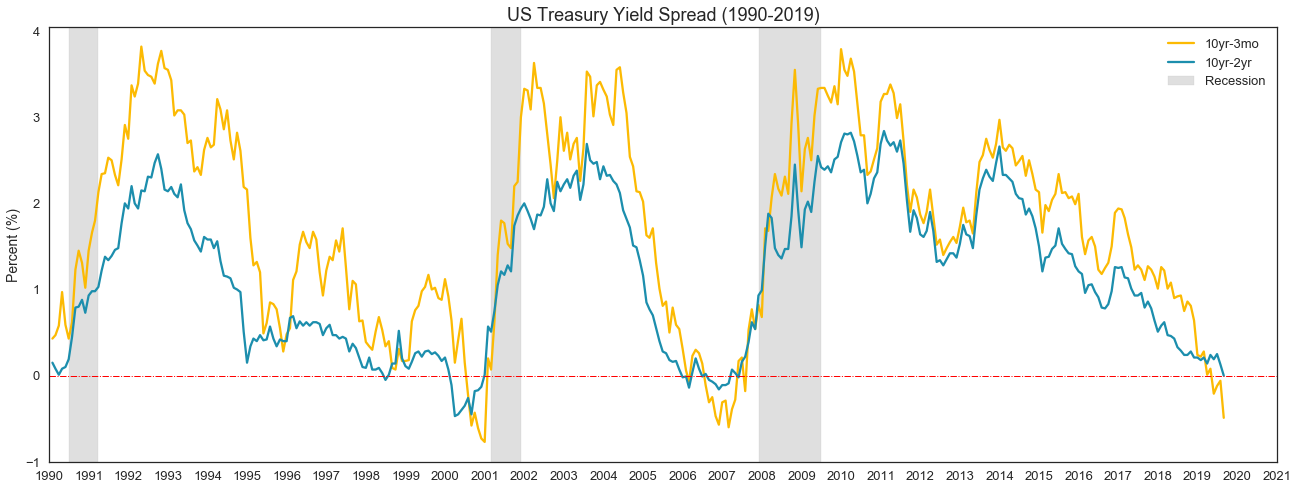

In [70]:
# plot the chart
fig, ax = plt.subplots(figsize=(22,8))
plt.ylabel("Percent (%)", fontsize=14)
plt.plot(df1_month["10yr-3mo"], label="10yr-3mo", color="#fcba03")
plt.plot(df1_month["10yr-2yr"], label="10yr-2yr", color="#1c8ead")

# locate every month and year
years = mdates.YearLocator()   
months = mdates.MonthLocator()

# define the date format
myFmt = mdates.DateFormatter("%Y") 

# tell matplotlib to use the format specified above
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(myFmt)

# plot a horizontal line at y=0
plt.axhline(y=0, color="red", linestyle="-.", linewidth=1)

# set the limit of x axis
plt.xlim([datetime.date(1990, 1, 1), datetime.date(2021, 1, 1)])

# plot recession periods
plt.axvspan(datetime.date(1990, 7, 1), datetime.date(1991, 3, 31), alpha=0.5, color='silver', label="Recession")
plt.axvspan(datetime.date(2001, 3, 1), datetime.date(2001, 11, 30), alpha=0.5, color='silver')
plt.axvspan(datetime.date(2007, 12, 1), datetime.date(2009, 6, 30), alpha=0.5, color='silver')

# set title and fontsize
plt.title("US Treasury Yield Spread (1990-2019)", fontsize=18)

# show legend
plt.legend()
plt.show()

## S&P500 Data

In [71]:
# resample the daily data into monthly data
# readjust data according to the month's OHLC & volume
df2_month = df2.resample("M").agg({'Open':'first',
                                   'High':'max',
                                   'Low':'min', 
                                   'Close':'last', 
                                   'Adj Close':'last', 
                                   'Volume':'sum'})

# check the last 5 rows
df2_month.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-04-30  2848.629883  2949.520020  2848.629883  2945.830078  2945.830078   
2019-05-31  2952.330078  2954.129883  2750.520020  2752.060059  2752.060059   
2019-06-30  2751.530029  2964.149902  2728.810059  2941.760010  2941.760010   
2019-07-31  2971.409912  3027.979980  2952.219971  2980.379883  2980.379883   
2019-08-31  2980.320068  3013.590088  2822.120117  2926.459961  2926.459961   

                 Volume  
Date                     
2019-04-30  69604840000  
2019-05-31  76860120000  
2019-06-30  70881390000  
2019-07-31  70349470000  
2019-08-31  79599440000

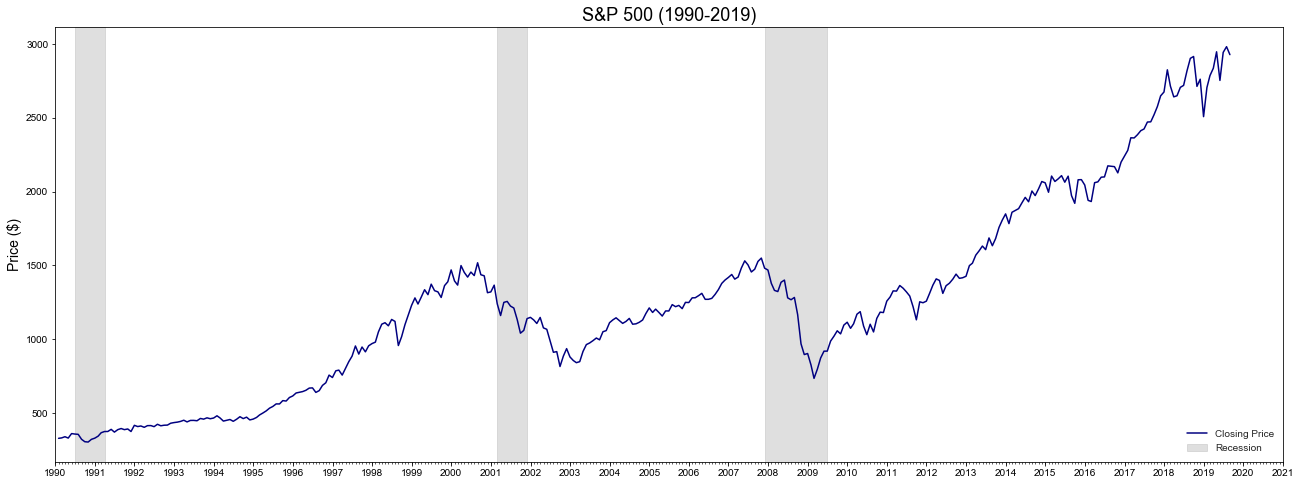

In [35]:
# plot the chart
fig, ax = plt.subplots(figsize=(22,8))
plt.style.use('seaborn-white')
plt.ylabel("Price ($)", fontsize=14)
plt.plot(df2_month["Close"], label="Closing Price", color="Navy")

# locate every month and year
years = mdates.YearLocator()   
months = mdates.MonthLocator()

# define the date format
myFmt = mdates.DateFormatter("%Y") 

# tell matplotlib to use the format specified above
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(myFmt)

# set the limit and x axis
plt.xlim([datetime.date(1990, 1, 1), datetime.date(2021, 1, 1)])

# plot recession periods
plt.axvspan(datetime.date(1990, 7, 1), datetime.date(1991, 3, 31), alpha=0.5, color='silver', label="Recession")
plt.axvspan(datetime.date(2001, 3, 1), datetime.date(2001, 11, 30), alpha=0.5, color='silver')
plt.axvspan(datetime.date(2007, 12, 1), datetime.date(2009, 6, 30), alpha=0.5, color='silver')

# set title and fontsize
plt.title("S&P 500 (1990-2019)", fontsize=18)

# show legend
plt.legend()
plt.show()

In [39]:
# plot candlestick chart
fig = go.Figure(data=go.Candlestick(x=df2_month.index,
                    open=df2_month['Open'],
                    high=df2_month['High'],
                    low=df2_month['Low'],
                    close=df2_month['Close']))
# chart elements
fig.update_layout(
    title='S&P 500 Monthly Chart (1990 - 2019)',
    yaxis_title='Price ($)',
    template = 'plotly_white'
)

fig.show()

In [74]:
# Calculate 20 Period Moving Average, Std Deviation, Upper Band and Lower Band
df2_month['20 Period MA'] = df2_month['Adj Close'].rolling(window=20).mean()
df2_month['20 Period STD'] = df2_month['Adj Close'].rolling(window=20).std()
df2_month['Upper Band'] = df2_month['20 Period MA'] + (df2_month['20 Period STD'] * 2)
df2_month['Lower Band'] = df2_month['20 Period MA'] - (df2_month['20 Period STD'] * 2)
df2_month.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-04-30  2848.629883  2949.520020  2848.629883  2945.830078  2945.830078   
2019-05-31  2952.330078  2954.129883  2750.520020  2752.060059  2752.060059   
2019-06-30  2751.530029  2964.149902  2728.810059  2941.760010  2941.760010   
2019-07-31  2971.409912  3027.979980  2952.219971  2980.379883  2980.379883   
2019-08-31  2980.320068  3013.590088  2822.120117  2926.459961  2926.459961   

                 Volume  20 Period MA  20 Period STD   Upper Band   Lower Band  
Date                                                                            
2019-04-30  69604840000   2727.269043     122.577807  2972.424658  2482.113428  
2019-05-31  76860120000   2738.904041     112.428238  2963.760516  2514.047565  
2019-06-30  70881390000   2757.229041     114.205984  2985.641008  2528.817073  
2019-07-31  70349470000   2773.869031     121.406829  3016.682689  2531.055373  
2019-08-31  79599440000   2786.511523     123.562946  3033.637416  2539.385631

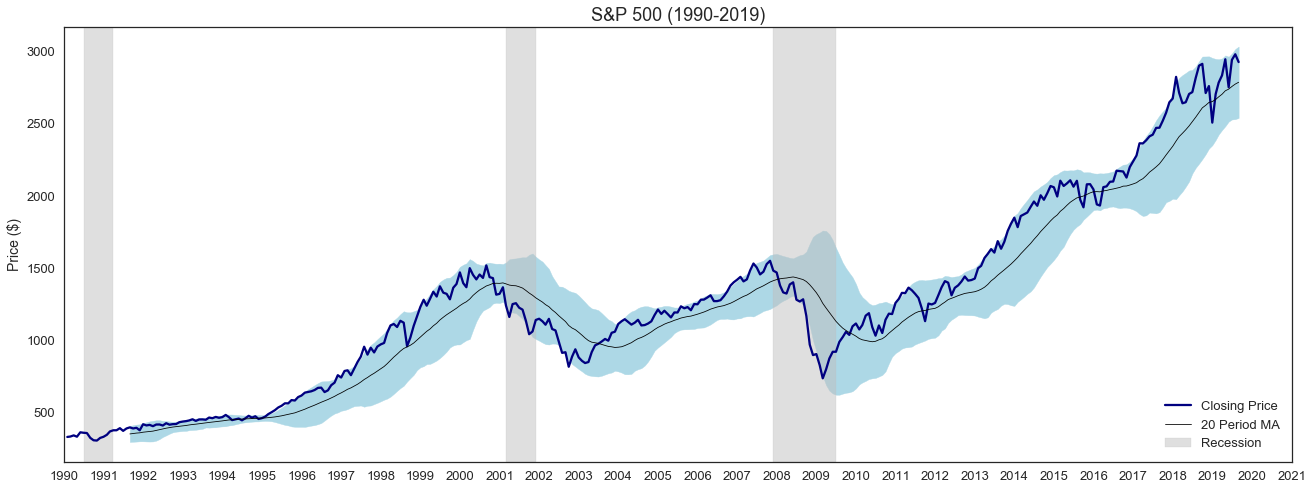

In [84]:
# plot the chart
fig, ax = plt.subplots(figsize=(22,8))
plt.style.use('seaborn-talk')
plt.ylabel("Price ($)", fontsize=14)
plt.plot(df2_month["Adj Close"], label="Closing Price", color="Navy")

# locate every month and year
years = mdates.YearLocator()   
months = mdates.MonthLocator()

# define the date format
myFmt = mdates.DateFormatter("%Y") 

# tell matplotlib to use the format specified above
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(myFmt)

# format background colour
ax.set_facecolor("white")

# set the limit and x axis
plt.xlim([datetime.date(1990, 1, 1), datetime.date(2021, 1, 1)])

# Plot shaded 20 Day Bollinger Band for S&P 500
ax.fill_between(x_axis, df2_month['Upper Band'], df2_month['Lower Band'], color='lightblue')

# Plot Adjust Moving Averages
ax.plot(x_axis, df2_month['20 Period MA'], color='black', lw=.8)

# plot recession periods
plt.axvspan(datetime.date(1990, 7, 1), datetime.date(1991, 3, 31), alpha=0.5, color='silver', label="Recession")
plt.axvspan(datetime.date(2001, 3, 1), datetime.date(2001, 11, 30), alpha=0.5, color='silver')
plt.axvspan(datetime.date(2007, 12, 1), datetime.date(2009, 6, 30), alpha=0.5, color='silver')

# set title and fontsize
plt.title("S&P 500 (1990-2019)", fontsize=18)

# show legend
plt.legend()
plt.show()

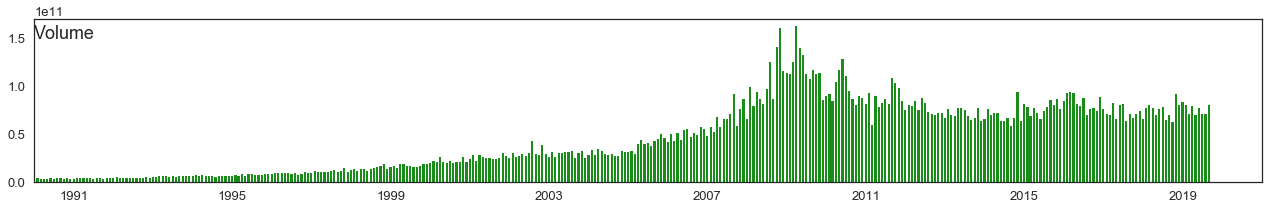

In [83]:
fig = plt.figure(figsize=(22,3))
plt.bar(df2_month.index, df2_month['Volume'], color='g', alpha=0.9, width=20)

x_axis = df2_month.index.get_level_values(0)
# set the limit for x axis
plt.xlim([datetime.date(1990, 1, 1), datetime.date(2021, 1, 1)])
plt.title("Volume", fontsize=18, loc="left", pad=-20)
plt.show()

In [85]:
# resample the daily data into yearly data
# readjust data according to the year's OHLC & volume
df2_year = df2.resample("Y").agg({'Open':'first',
                                   'High':'max',
                                   'Low':'min', 
                                   'Close':'last', 
                                   'Adj Close':'last', 
                                   'Volume':'sum'})

# check the last 5 rows
df2_year.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2015-12-31  2058.899902  2134.719971  1867.010010  2043.939941  2043.939941   
2016-12-31  2038.199951  2277.530029  1810.099976  2238.830078  2238.830078   
2017-12-31  2251.570068  2694.969971  2245.129883  2673.610107  2673.610107   
2018-12-31  2683.729980  2940.909912  2346.580078  2506.850098  2506.850098   
2019-12-31  2476.959961  3027.979980  2443.959961  2926.459961  2926.459961   

                  Volume  
Date                      
2015-12-31  921218600000  
2016-12-31  984118470000  
2017-12-31  856488130000  
2018-12-31  906714990000  
2019-12-31  596466600000

In [86]:
# add percentage change column
df2_year['pct_chg'] = df2_year.Close.pct_change(periods = 1)
df2_year.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-12-31  353.399994  369.779999  294.510010  330.220001  330.220001   
1991-12-31  330.200012  418.320007  309.350006  417.089996  417.089996   
1992-12-31  417.029999  442.649994  392.410004  435.709991  435.709991   
1993-12-31  435.700012  471.290009  426.880005  466.450012  466.450012   
1994-12-31  466.510010  482.850006  435.859985  459.269989  459.269989   

                 Volume   pct_chg  
Date                               
1990-12-31  39682730000       NaN  
1991-12-31  45338650000  0.263067  
1992-12-31  51314600000  0.044643  
1993-12-31  66972190000  0.070552  
1994-12-31  73448340000 -0.015393

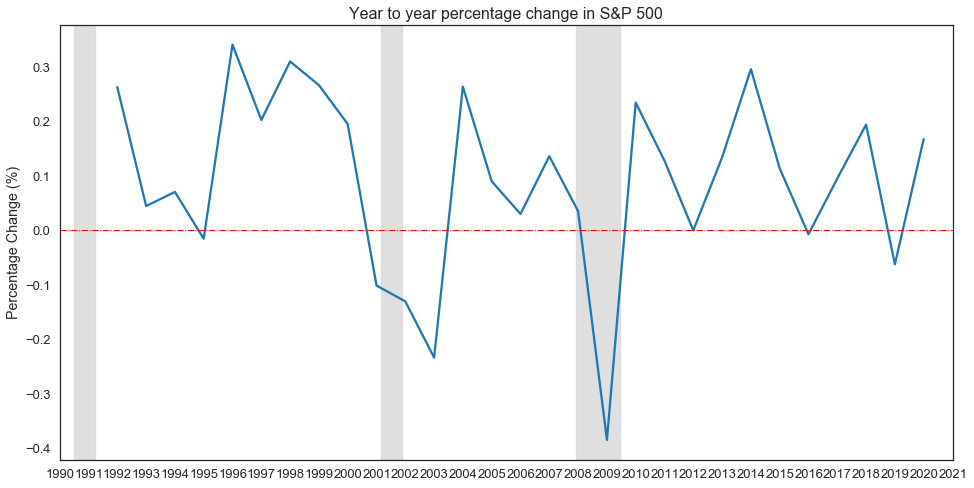

In [72]:
# plot year to year percentage change chart
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(df2_year["pct_chg"])

# locate every year
years = mdates.YearLocator()

# define the date format
myFmt = mdates.DateFormatter("%Y") 

# tell matplotlib to use the format specified above
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(myFmt)

# set the limit and x axis
plt.xlim([datetime.date(1990, 1, 1), datetime.date(2021, 1, 1)])

# plot a horizontal line at y=0
plt.axhline(y=0, color="red", linestyle="-.", linewidth=1)

# plot recession periods
plt.axvspan(datetime.date(1990, 7, 1), datetime.date(1991, 3, 31), alpha=0.5, color='silver', label='Recession')
plt.axvspan(datetime.date(2001, 3, 1), datetime.date(2001, 11, 30), alpha=0.5, color='silver')
plt.axvspan(datetime.date(2007, 12, 1), datetime.date(2009, 6, 30), alpha=0.5, color='silver')

plt.title('Year to year percentage change in S&P 500', fontsize='16')
plt.ylabel('Percentage Change (%)')
plt.show()

In [43]:
# new df2 for 2019; drop Date column
df2_2019 = df2.loc[df2['Date']>='2019-01-01'].drop(columns = ["Date"])
df2_2019.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-02  2476.959961  2519.489990  2467.469971  2510.030029  2510.030029   
2019-01-03  2491.919922  2493.139893  2443.959961  2447.889893  2447.889893   
2019-01-04  2474.330078  2538.070068  2474.330078  2531.939941  2531.939941   
2019-01-07  2535.610107  2566.159912  2524.560059  2549.689941  2549.689941   
2019-01-08  2568.110107  2579.820068  2547.560059  2574.409912  2574.409912   

                Volume  
Date                    
2019-01-02  3733160000  
2019-01-03  3822860000  
2019-01-04  4213410000  
2019-01-07  4104710000  
2019-01-08  4083030000

In [44]:
fig = go.Figure(data=go.Candlestick(x=df2_2019.index,
                    open=df2_2019['Open'],
                    high=df2_2019['High'],
                    low=df2_2019['Low'],
                    close=df2_2019['Close']))
fig.update_layout(
    title='S&P500 Daily Chart (2019)',
    yaxis_title='Price ($)',
    template = 'plotly_white'
)

fig.show()